In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
cluster_data = pd.read_csv('cluster_data.csv')

In [3]:
cluster_data.head()

,title,n_grams,путин,медведев,гейропа,доллар,евро,кризис
0,Кузбасс говно,экономический_кризис,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001


# Тестим кластеризацию

In [4]:
import sklearn

In [5]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

# bubbles

In [6]:
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

X = StandardScaler().fit_transform(X)

# small_sample

In [19]:
small_sample = pd.read_csv('lvl3_words_limit4.csv')
small_sample.fillna(0, inplace=True)
small_sample.head()

,ID,id,n_grams,topic_label,екатеринбург,знаменка,посвященный,свердловский,состоится,ао,...,царь,2014-2016,водохранилище,ириклинский,молодь,оренбургский,гривна,заказывает,каталог,одежда
0,0,2014719.0,территория_регион заместитель_министр свердлов...,1 августа в Свердловской области ожидаются сле...,0.269231,0.153846,0.153846,0.192308,0.230769,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2014720.0,номер_журнал сведение_относительно программа_с...,Су-57: официальное наименование серийного вари...,0.000000,0.000000,0.000000,0.000000,0.000000,0.016611,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,157636.0,участник_форум,Псориаз: Определение,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,157282.0,житель_земля солнечный_затмение солнечный_затм...,Эксперты посчитали счастливых россиян в стране,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,82203426.0,дальний_восток электронный_виза включая_япония...,Россия открыла выдачу электронных виз,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
X = small_sample.drop(['ID', 'id', 'n_grams', 'topic_label'], axis=1)

# DBSCAN Clustering

In [49]:
db = DBSCAN(eps=0.3, min_samples=1).fit(X)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print(n_clusters_)


88


In [50]:
print(labels)

[ 0  1  2  1  3  4  5  1  1  1  1  1  1  6  1  1  7  1  8  9  1  1 10  1  1
  1 11  1 12 13 14  1 15 16 17 18 19 20 21 22  1  1 23 24  1  1 25  1 26 27
  1 28 29  1 30  1 31  1  1  1 32 33 34 35  1  1 36  1  1 37  1  1  1  1  1
 38  1  1 39 40 41  1 42  3  1  1  1  1  1 43 44  1 45  1  1 46  1 16  1 47
  1  1 48  1  1  1 49 50  8  1 51 52 53 54 55 56 56  1  1  1 57 58 59  1 60
 61 36  1  1 62 63  1  1  1 64  1 65 16  1  1  1  1  1  1 66  1  1  1 67  1
 68  1  1  1  1 69  1  1 70  1  1  1  1  1 71  1 72 73  1  1 74  1 75  1 76
 77  1  1  1  1 78  1  1 79 79  1  1  1  1 80 81 82 83 83  1  1 84 84 85  1
  1 86 87]


# hierarchial clustering


In [10]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(X, 'ward')

In [11]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

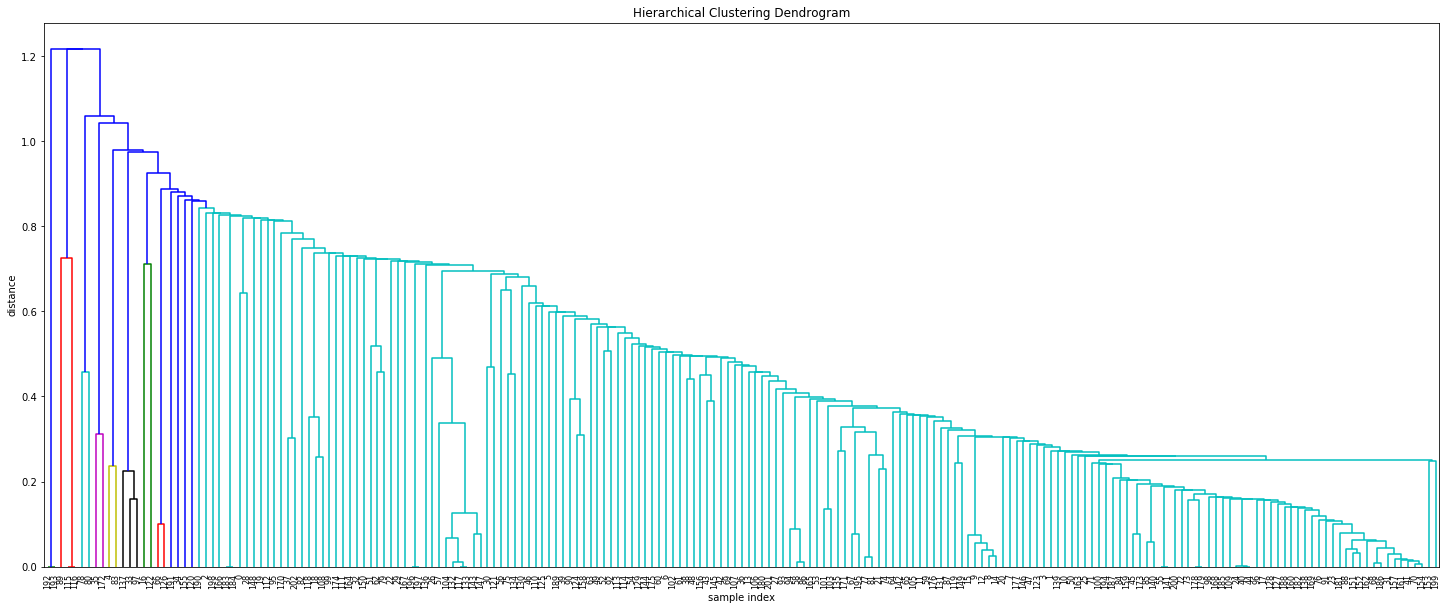

In [12]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [13]:
llist = [157, 161, 41,70, 154, 151, 152]
list(small_sample.iloc[llist]['topic_label'])

['Курганские полицейские посмотрели на купающихся горожан',
 'Черновицкие депутаты против лишения Саакашвили гражданства',
 'В Магадане полицейские раскрыли грабёж',
 'Курганские полицейские посмотрели на купающихся горожан',
 'В Магадане полицейские раскрыли грабёж',
 'Приморье полностью оправилось от июльских ливней',
 'Приморье полностью оправилось от июльских ливней']

In [14]:
good_list = [57, 134, 132, 117, 133, 143, 147]
list(small_sample.iloc[good_list]['topic_label'])

['Facebook отключил искусственный интеллект, создавший собственный язык',
 'Амурская область теряет 9 человек в день',
 'Facebook отключил ботов, разработавших собственный язык',
 'Facebook отключил ботов, разработавших собственный язык',
 'Facebook отключил ботов, разработавших собственный язык',
 'Facebook отключил чат-ботов, создавших собственный язык',
 'Facebook отключил чат-ботов, создавших собственный язык']

In [15]:
good_list2 = [119, 149, 15, 9, 12, 8, 14]
list(small_sample.iloc[good_list2]['topic_label'])

['МЧС прогнозирует непогоду в Свердловской области',
 'Оперативная обстановка на территории Хабаровского края на 01 августа 2017 г.',
 'Украина осуждает попытки узурпировать власть в Венесуэле',
 'Украина осуждает попытки узурпировать власть в Венесуэле',
 'Украина осуждает попытки узурпировать власть в Венесуэле',
 'Украина осуждает попытки узурпировать власть в Венесуэле',
 'Украина осуждает попытки узурпировать власть в Венесуэле']

In [16]:
good_list3 = [151, 152, 162, 68, 186, 31, 157, 161, 40, 70, 154]
(small_sample[['topic_label', 'id']].iloc[good_list3])

,topic_label,id
151,Приморье полностью оправилось от июльских ливней,157669.0
152,Приморье полностью оправилось от июльских ливней,157669.0
162,В Челябинске появится новый мусорный полигон,157776.0
68,Саакашвили анонсировал возвращение на Украину,145948.0
186,Саакашвили анонсировал возвращение на Украину,145948.0
31,«Спасибо за гостеприимство!»,157563.0
157,Курганские полицейские посмотрели на купающихс...,149731.0
161,Черновицкие депутаты против лишения Саакашвили...,157634.0
40,Заявление Председателя ЦК КПРФ Г.А. Зюганова,154562.0
70,Курганские полицейские посмотрели на купающихс...,149731.0


In [33]:
small_sample.loc[good_list, (small_sample.iloc[good_list] >0.09).any(axis=0)]

,ID,id,n_grams,topic_label,язык,facebook,умерший,интеллект,искусственный,%,амурский,естественный,прибывший,убыль,уехавший
57,57,82149676.0,социальный_сеть_facebook база_искусственный_ин...,"Facebook отключил искусственный интеллект, соз...",0.183333,0.200000,0.000000,0.133333,0.133333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
134,134,158429.0,численность_постоянный_население амурский_обла...,Амурская область теряет 9 человек в день,0.000000,0.000000,0.102564,0.000000,0.000000,0.153846,0.153846,0.128205,0.179487,0.153846,0.128205
132,132,157648.0,компания_facebook решение_закрыть система_иску...,"Facebook отключил ботов, разработавших собстве...",0.067067,0.043621,0.000000,0.070338,0.071429,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
117,117,157648.0,компания_facebook решение_закрыть система_иску...,"Facebook отключил ботов, разработавших собстве...",0.067067,0.043621,0.000000,0.070338,0.071429,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
133,133,157648.0,компания_facebook решение_закрыть система_иску...,"Facebook отключил ботов, разработавших собстве...",0.067067,0.043621,0.000000,0.070338,0.071429,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
143,143,157732.0,соцсеть_facebook база_искусственный_интеллект ...,"Facebook отключил чат-ботов, создавших собстве...",0.060976,0.052265,0.000000,0.080139,0.080139,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
147,147,157732.0,новый_сервис мгновенный_сообщение главный_ново...,"Facebook отключил чат-ботов, создавших собстве...",0.060976,0.052265,0.000000,0.080139,0.080139,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


# Other stuff

In [25]:
print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

[-1  0 -1  0 -1 -1 -1 -1  0  0  0 -1  0 -1  0  0 -1  0 -1 -1  0  0 -1  0  0
  0 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1  0  0 -1 -1  0  0 -1 -1 -1 -1
  0 -1 -1 -1 -1  0 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1  0  0 -1  0  0  0  0  0
 -1  0  0 -1 -1 -1  0 -1 -1  0  0  0  0  0 -1 -1  0 -1 -1  0 -1  0 -1  0 -1
  0  0 -1  0  0 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1
 -1 -1  0  0 -1 -1 -1  0  0 -1 -1 -1 -1  0  0  0  0 -1  0 -1 -1 -1  0 -1  0
 -1  0  0  0  0 -1 -1  0 -1  0  0  0  0  0 -1 -1 -1 -1  0  0 -1 -1 -1  0 -1
 -1 -1 -1  0  0 -1  0  0 -1 -1  0  0  0  0 -1 -1 -1 -1 -1  0  0 -1 -1 -1  0
  0 -1 -1]


Estimated number of clusters: 3
Homogeneity: 0.880
Completeness: 0.724
V-measure: 0.794
Adjusted Rand Index: 0.809
Adjusted Mutual Information: 0.723
Silhouette Coefficient: 0.543


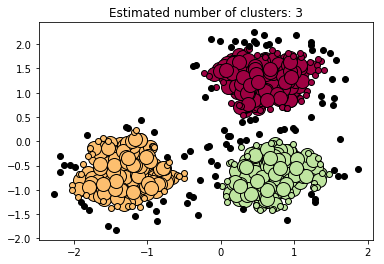

In [15]:
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]
        
    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

# LVL3 EXPERIMENTS

In [249]:
lvl3_data = pd.read_csv('lvl3_words_2h_100.csv')
lvl3_data.sample(5)

,Unnamed: 0,distribution,id,topic_label
24360,24360,"[{'word': '58', 'prob': 0.10256410256410256}, ...",318203.0,Амурская молодежь получила федеральное финанси...
19671,19671,"[{'word': 'пример', 'prob': 0.0287769784172661...",2386885.0,Евразийская задача: как перейти от сырьевой эк...
5964,5964,"[{'word': 'посетитель', 'prob': 0.004655493482...",197759.0,И снова сын чиновника сбил ребенка
21106,21106,"[{'word': 'смена', 'prob': 0.38461538461538464...",297702.0,В регионе стартует областная военно-спортивная...
29635,29635,"[{'word': 'двуколка', 'prob': 0.00451807228915...",352611.0,Карма


In [250]:
lvl3_data.shape

(34115, 4)

In [251]:
import json
from tqdm import tqdm_notebook as tqdm

In [252]:
from sklearn.feature_extraction.text import CountVectorizer
counter = CountVectorizer(max_features=3)
counter.fit_transform(['ass', 'ass', 'bitch', 'ass', 'bitch', 'philya', 'philya', 'philya', 'philya', 'philya', 'philya']).toarray()
# counter.transform()
counter.vocabulary_

{'ass': 0, 'bitch': 1, 'philya': 2}

In [253]:
list_of_all_words = []
for i in tqdm(range(len(lvl3_data))):
    strobj = str(lvl3_data.iloc[i]['distribution']).replace(" '", ' "').replace("' " , '" ').replace("{'", '{"').replace("':" , '":').replace("',", '",')
#     print(strobj)
    
    jsonobj = json.loads(strobj)
    list_of_all_words.extend([d['word'] for d in jsonobj])
    
list_of_all_words[:10]

A Jupyter Widget

['посвященный',
 'знаменка',
 'екатеринбург',
 'свердловский',
 'состоится',
 'самолет',
 'опытный',
 'двигатель',
 'экземпляр',
 'тонна']

In [254]:
print(strobj)

[{"word": "диплом", "prob": 0.08695652173913043}, {"word": "судья", "prob": 0.15217391304347827}, {"word": "университет", "prob": 0.08695652173913043}, {"word": "справка", "prob": 0.08695652173913043}, {"word": "выдавал", "prob": 0.08695652173913043}, {"word": "госуниверситет", "prob": 0.10869565217391304}, {"word": "хахалева", "prob": 0.10869565217391304}, {"word": "новости-грузия", "prob": 0.10869565217391304}, {"word": "сухумский", "prob": 0.17391304347826086}]


In [255]:
len(list_of_all_words)

736211

In [256]:
counter = CountVectorizer(max_features=2000)
counter.fit(list_of_all_words)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=2000, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [257]:
hue_moe = np.zeros((lvl3_data.shape[0], counter.max_features))
for i in tqdm(range(len(lvl3_data))):
    strobj = str(lvl3_data.iloc[i]['distribution']).replace(" '", ' "').replace("' " , '" ').replace("{'", '{"').replace("':" , '":').replace("',", '",')
#     print(strobj)
    
    jsonobj = json.loads(strobj)
    for d in jsonobj:
#         hue_moe[i, counter.vocabulary_[d['word']]] = d['prob']
        hue_moe[i] += counter.transform([d['word']]) * d['prob']

A Jupyter Widget

In [258]:
hue_moe[(hue_moe.sum(axis=1)==0), :].shape

(1185, 2000)